<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S4_1_Le_diab%C3%A8te_en_Naive_Bayes_Exercice_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Le diabète en Naive Bayes 

Nous allons aujourd'hui étudier le diabète dans les population d'indiens d'amérique. Regardons comment Naive Bayes peut nous aider dans la prédiction de diabiète 

0. Importez les librairies usuelles 

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

1. Importez le dataset dans un DataFrame 

In [0]:
dataset = pd.read_csv("https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.3%20--%20Machine%20Learning%20Supervis%C3%A9/S3-6%20--%20Naive%20Bayes/S3-6B/Datasets/diabetes.csv?token=AFB53D4OXWLHOUDGJ64T5NS5TQ6CG")


In [0]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Faites une description du dataset

In [0]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


3. Il semblerait que nous ayons des valeurs aberrantes. Enlevez toutes les valeurs pour lesquelles l'insuline est à plus de 3 écart-types de la moyenne 

In [0]:
dataset = dataset[(dataset.Insulin < dataset.Insulin.mean() + 3*dataset.Insulin.std()) & (dataset.Insulin > dataset.Insulin.mean()- 3*dataset.Insulin.std())]
dataset = dataset[dataset.Insulin>0]
dataset = dataset[dataset.Glucose>0]
dataset = dataset[dataset.BMI>0]
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,3.310160,120.548128,70.529412,28.831551,137.152406,32.899733,0.516422,30.687166,0.315508
std,3.229398,29.758935,12.534903,10.502698,80.448580,7.026932,0.326144,9.988250,0.465340
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,20.250000,76.000000,27.925000,0.273000,23.000000,0.000000
50%,2.000000,117.000000,70.000000,29.000000,120.000000,33.100000,0.446500,27.000000,0.000000
75%,5.000000,139.000000,78.000000,36.000000,180.000000,36.875000,0.681000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,415.000000,67.100000,2.420000,81.000000,1.000000


4. Faites un boxplot pour voir la répartition de l'Insuline dans le dataset 

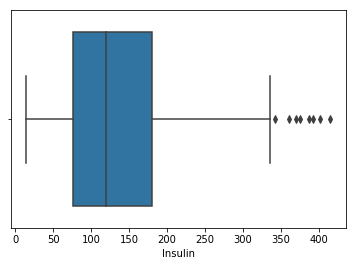

In [0]:
sns.boxplot(x=dataset.Insulin)

5. Regardez la distribution de chacune de vos colonnes 

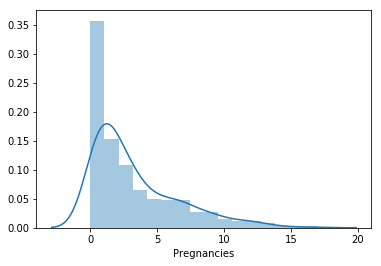

In [0]:
sns.distplot(dataset.iloc[:,0])

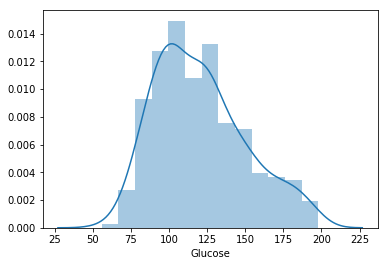

In [0]:
sns.distplot(dataset.iloc[:,1])

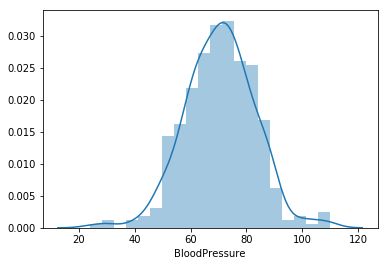

In [0]:
sns.distplot(dataset.iloc[:,2])

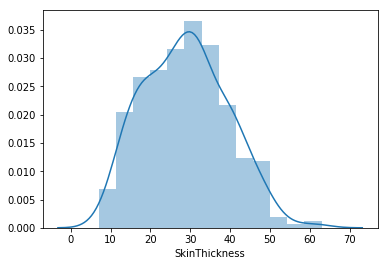

In [0]:
sns.distplot(dataset.iloc[:,3])

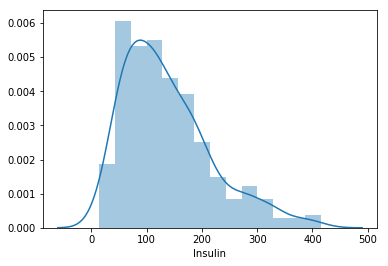

In [0]:
sns.distplot(dataset.iloc[:,4])

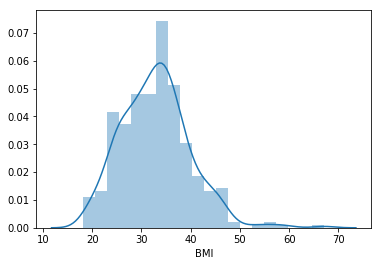

In [0]:
sns.distplot(dataset.iloc[:,5])

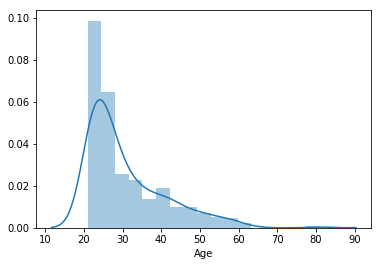

In [0]:
sns.distplot(dataset.iloc[:,7])

6. On voit que nous avons encore des valeurs qui semblent aberrantes. Reproduisons la même techniques que nous avons utilisée plus haut pour retirer les valeurs aberrantes 

In [0]:
dataset = dataset[(dataset < dataset.mean() + 3*dataset.std()) & (dataset > dataset.mean()- 3*dataset.std())]

In [0]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137,40.0,35.0,168.0,43.1,NaN,33.0,1
6,3.0,78,50.0,32.0,88.0,31.0,0.248,26.0,1
14,5.0,166,72.0,19.0,175.0,25.8,0.587,51.0,1
16,0.0,118,84.0,47.0,230.0,45.8,0.551,31.0,1


7. Remplacez les valeurs NaN par une interpolation

In [0]:
dataset = dataset.interpolate?

 8. Séparez votre dataset en un train et un test set 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:,-1], random_state = 42, test_size = 0.3)

9. Passons maintenant par une phase de normalisation. Normalisez toutes vos variables explicatives puis stockez les dans une variable X.

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc_x.transform(X_test), columns=X_train.columns)

10. Regardez maintenant la distribution de chacune des variables 

ValueError: ignored

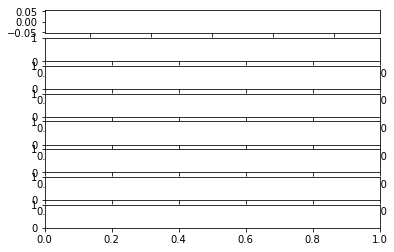

In [0]:
f, ax = plt.subplots(8,1)
for i,a in zip(X_train.columns,ax):
  sns.distplot(pd.DataFrame(X_train[i]), ax = a)

11. Importez Gaussian Naive Bayes & entrainez le sur votre données d'entraînement 

In [0]:
import sklearn.naive_bayes as nb
naivebayes = nb.GaussianNB()
naivebayes_fit = naivebayes.fit(X_train, y_train)

ValueError: ignored

12. Regardez votre performance 

In [0]:
naivebayes_fit.score(X_test,y_test)

0.7297297297297297

13. Voyons si nous pouvons améliorer notre modèle. Faites un pointplot sur chacune des varaibles par rapport à l'outcome. Pourrait-on créer de nouvelles variables ? 

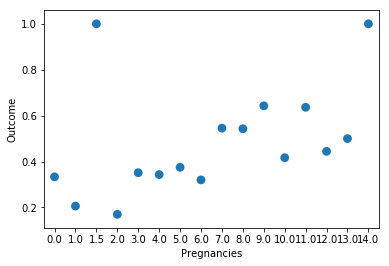

In [0]:
sns.pointplot(x=dataset.iloc[:,0],y=dataset.iloc[:,-1], join=False, ci=None)

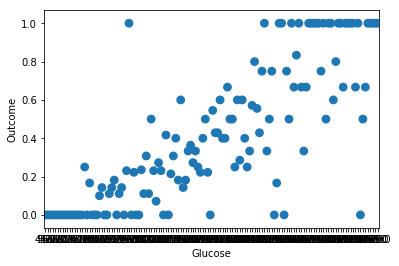

In [0]:
sns.pointplot(x=dataset.iloc[:,1],y=dataset.iloc[:,-1], join=False, ci=None)

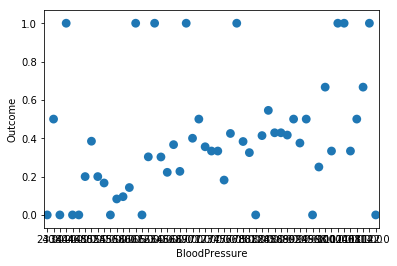

In [0]:
sns.pointplot(x=dataset.iloc[:,2],y=dataset.iloc[:,-1], join=False, ci=None)

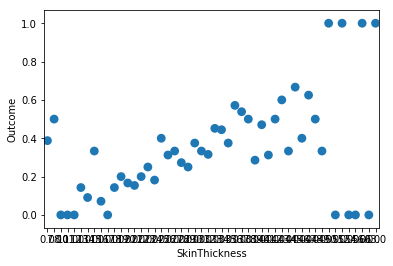

In [0]:
sns.pointplot(x=dataset.iloc[:,3],y=dataset.iloc[:,-1], join=False, ci=None)

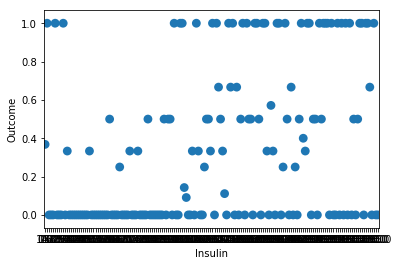

In [0]:
sns.pointplot(x=dataset.iloc[:,4],y=dataset.iloc[:,-1], join=False, ci=None)

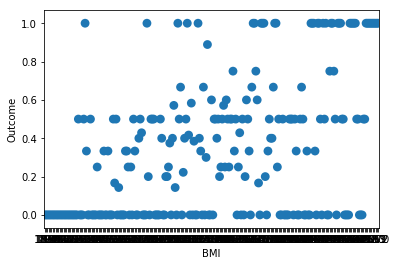

In [0]:
sns.pointplot(x=dataset.iloc[:,5],y=dataset.iloc[:,-1], join=False, ci=None)

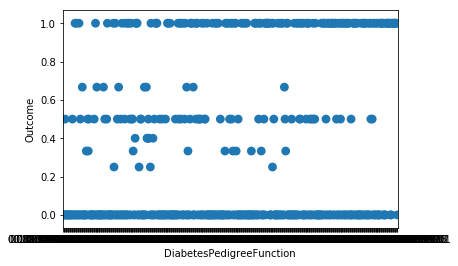

In [0]:
sns.pointplot(x=dataset.iloc[:,6],y=dataset.iloc[:,-1], join=False, ci=None)

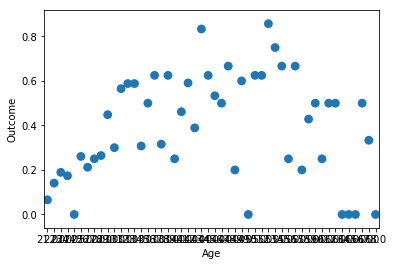

In [0]:
sns.pointplot(x=dataset.iloc[:,7],y=dataset.iloc[:,-1], join=False, ci=None)

14. Faisons un modèle de Bagging avec Naive Bayes. En utilisant le module ```BaggingClassifier```, Tentez de créer un nouveau modèle

In [0]:
from sklearn.ensemble import BaggingClassifier as BC
naivebayes = nb.GaussianNB()
modelB = BC(base_estimator = naivebayes, n_estimators = 1000, warm_start = True, bootstrap_features=True, max_samples=0.9)
modelB_fit = modelB.fit(X_train,y_train)

modelB_fit.score(X_test,y_test)

0.7422222222222222

15. Tentez de refaire votre modèle cette fois avec Bernouilli Naive Bayes 

In [0]:
X_test_discrete.head()

,Pregnancies_0.0,Pregnancies_1.0,Pregnancies_2.0,Pregnancies_3.0,Pregnancies_4.0,Pregnancies_5.0,Pregnancies_6.0,Pregnancies_7.0,Glucose_0.0,Glucose_1.0,Glucose_2.0,Glucose_3.0,Glucose_4.0,Glucose_5.0,Glucose_6.0,Glucose_7.0,Glucose_8.0,Glucose_9.0,BloodPressure_0.0,BloodPressure_1.0,BloodPressure_2.0,BloodPressure_3.0,BloodPressure_4.0,BloodPressure_5.0,BloodPressure_6.0,BloodPressure_7.0,BloodPressure_8.0,BloodPressure_9.0,SkinThickness_0.0,SkinThickness_1.0,SkinThickness_2.0,SkinThickness_3.0,SkinThickness_4.0,SkinThickness_5.0,SkinThickness_6.0,SkinThickness_7.0,Insulin_0.0,Insulin_1.0,Insulin_2.0,Insulin_3.0,Insulin_4.0,Insulin_5.0,BMI_0.0,BMI_1.0,BMI_2.0,BMI_3.0,BMI_4.0,BMI_5.0,BMI_6.0,BMI_7.0,BMI_8.0,BMI_9.0,DiabetesPedigreeFunction_0.0,DiabetesPedigreeFunction_1.0,DiabetesPedigreeFunction_2.0,DiabetesPedigreeFunction_3.0,DiabetesPedigreeFunction_4.0,DiabetesPedigreeFunction_5.0,DiabetesPedigreeFunction_6.0,DiabetesPedigreeFunction_7.0,DiabetesPedigreeFunction_8.0,DiabetesPedigreeFunction_9.0,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(10, strategy='quantile', encode = "ordinal")
X_train_discrete = pd.DataFrame(kb.fit_transform(X_train), columns=X_train.columns, dtype=str)
X_test_discrete = pd.DataFrame(kb.transform(X_test), columns=X_train.columns, dtype=str)

X_train_discrete = pd.get_dummies(X_train_discrete)
X_test_discrete = pd.get_dummies(X_test_discrete)

from sklearn.naive_bayes import BernoulliNB
naivebayes = nb.BernoulliNB()
naivebayes_fit = naivebayes.fit(X_train_discrete,y_train)
naivebayes_fit.score(X_test_discrete, y_test)

X_train_discrete

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


,Pregnancies_0.0,Pregnancies_1.0,Pregnancies_2.0,Pregnancies_3.0,Pregnancies_4.0,Pregnancies_5.0,Pregnancies_6.0,Pregnancies_7.0,Glucose_0.0,Glucose_1.0,Glucose_2.0,Glucose_3.0,Glucose_4.0,Glucose_5.0,Glucose_6.0,Glucose_7.0,Glucose_8.0,Glucose_9.0,BloodPressure_0.0,BloodPressure_1.0,BloodPressure_2.0,BloodPressure_3.0,BloodPressure_4.0,BloodPressure_5.0,BloodPressure_6.0,BloodPressure_7.0,BloodPressure_8.0,BloodPressure_9.0,SkinThickness_0.0,SkinThickness_1.0,SkinThickness_2.0,SkinThickness_3.0,SkinThickness_4.0,SkinThickness_5.0,SkinThickness_6.0,SkinThickness_7.0,Insulin_0.0,Insulin_1.0,Insulin_2.0,Insulin_3.0,Insulin_4.0,Insulin_5.0,BMI_0.0,BMI_1.0,BMI_2.0,BMI_3.0,BMI_4.0,BMI_5.0,BMI_6.0,BMI_7.0,BMI_8.0,BMI_9.0,DiabetesPedigreeFunction_0.0,DiabetesPedigreeFunction_1.0,DiabetesPedigreeFunction_2.0,DiabetesPedigreeFunction_3.0,DiabetesPedigreeFunction_4.0,DiabetesPedigreeFunction_5.0,DiabetesPedigreeFunction_6.0,DiabetesPedigreeFunction_7.0,DiabetesPedigreeFunction_8.0,DiabetesPedigreeFunction_9.0,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


16. Refaites un modèle de Bagging pour voir si vous pouvez encore améliorer votre score 

In [0]:
naivebayes = nb.BernoulliNB()
modelB = BC(base_estimator = naivebayes, n_estimators = 1000)
modelB_fit = modelB.fit(X_train,y_train)

modelB_fit.score(X_test,y_test)

0.7466666666666667